## Sales Trend 2016/2017

In [55]:
# Imports
import pandas as pd
import functions as fc
import matplotlib.pyplot as plt
from itertools import groupby
from sklearn.linear_model import LinearRegression

# Read input file
sales_frame = fc.read_german_csv("data/nyc-rolling-sales_2003.csv")

print(sales_frame.head())
#print(sales_frame.dtypes)

# Changing format of boroughs to string (from int)
sales_frame["BOROUGH"] = sales_frame["BOROUGH"].apply(str)
# Replacing the "." and the "$" in the string and changing format of sale price to numeric (from str)
sales_frame["SALE PRICE"] = sales_frame["SALE PRICE"].str.replace(".", "")
sales_frame["SALE PRICE"] = sales_frame["SALE PRICE"].str.replace("$", "")
sales_frame["SALE PRICE"] = pd.to_numeric(sales_frame["SALE PRICE"], errors="coerce")
# Changing format of sale date to datetime (from str)
sales_frame["SALE DATE"] = pd.to_datetime(sales_frame["SALE DATE"], errors="coerce")
# Changing LSF and GSF to numeric values (from str)
sales_frame["LAND SQUARE FEET"] = pd.to_numeric(sales_frame["LAND SQUARE FEET"], errors="coerce")
sales_frame["GROSS SQUARE FEET"] = pd.to_numeric(sales_frame["GROSS SQUARE FEET"], errors="coerce")

# Replacing numbers of boroughs with actual name
sales_frame["BOROUGH"] = sales_frame["BOROUGH"].replace(["1"], "Manhattan")
sales_frame["BOROUGH"] = sales_frame["BOROUGH"].replace(["2"], "Brooklyn")
sales_frame["BOROUGH"] = sales_frame["BOROUGH"].replace(["3"], "Queens")
sales_frame["BOROUGH"] = sales_frame["BOROUGH"].replace(["4"], "The Bronx")
sales_frame["BOROUGH"] = sales_frame["BOROUGH"].replace(["5"], "Staten Island")

#print(sales_frame.dtypes)
#print(sales_frame.head())

C:\Users\Dome\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3249: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


   BOROUGH               NEIGHBORHOOD  \
0        1  ALPHABET CITY               
1        1  ALPHABET CITY               
2        1  ALPHABET CITY               
3        1  ALPHABET CITY               
4        1  ALPHABET CITY               

                        BUILDING CLASS CATEGORY TAX CLASS AT PRESENT  BLOCK  \
0  02  TWO FAMILY HOMES                                            1    375   
1  07  RENTALS - WALKUP APARTMENTS                                2A    372   
2  07  RENTALS - WALKUP APARTMENTS                                2A    372   
3  07  RENTALS - WALKUP APARTMENTS                                2B    378   
4  07  RENTALS - WALKUP APARTMENTS                                 2    391   

   LOT EASE-MENT BUILDING CLASS AT PRESENT  \
0   32                                  B9   
1   31                                  C3   
2   31                                  C3   
3   33                                  C4   
4   12                                  C1   

 

### Sales Trend (Price)

    SALE YEAR  SALE MONTH  SALE PRICE AGGREGATED
0        2003           1             3355919577
1        2003           2             3047715683
2        2003           3             3267009567
3        2003           4             3161188829
4        2003           5             3722952495
5        2003           6             3927935760
6        2003           7             3802772664
7        2003           8             4200360255
8        2003           9             4719599866
9        2003          10             5151297056
10       2003          11             3315023453
11       2003          12             4061127301


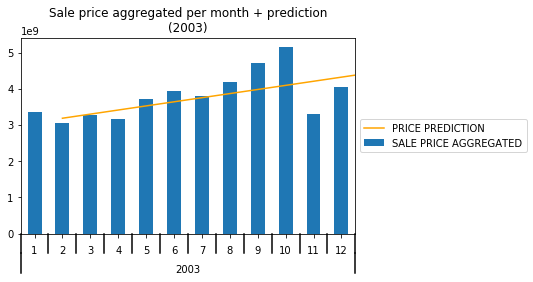

In [56]:
#Grouping SALE PRICE by SALE DATE (year --> month)
sales_frame_sale_date = sales_frame.groupby([sales_frame["SALE DATE"].dt.year.rename("SALE YEAR"), sales_frame["SALE DATE"].dt.month.rename("SALE MONTH")])
month_sale_price = sales_frame_sale_date["SALE PRICE"].sum().reset_index()
month_sale_price = month_sale_price.rename(columns={"SALE PRICE": "SALE PRICE AGGREGATED"})
#month_sale_price = groupedby_sale_price.set_index()
#pd.options.display.float_format = '{:.2f}'.format
print(month_sale_price)

xs = month_sale_price["SALE MONTH"]
ys = month_sale_price["SALE PRICE AGGREGATED"]

model = LinearRegression()
xsl = []
for x in xs:
    xsl.append([x])
model.fit(xsl, ys)

predicted = model.predict(xsl)

def test_table():
    data_table = month_sale_price
    return data_table

def add_line(ax, xpos, ypos):
    line = plt.Line2D([xpos, xpos], [ypos + .1, ypos],
                      transform=ax.transAxes, color='black')
    line.set_clip_on(False)
    ax.add_line(line)

def label_len(my_index,level):
    labels = my_index.get_level_values(level)
    return [(k, sum(1 for i in g)) for k,g in groupby(labels)]

def label_group_bar_table(ax, df):
    ypos = -.1
    scale = 1./df.index.size
    for level in range(df.index.nlevels)[::-1]:
        pos = 0
        for label, rpos in label_len(df.index,level):
            lxpos = (pos + .5 * rpos)*scale
            ax.text(lxpos, ypos, label, ha='center', transform=ax.transAxes)
            add_line(ax, pos*scale, ypos)
            pos += rpos
        add_line(ax, pos*scale , ypos)
        ypos -= .1

df = test_table().groupby(["SALE YEAR", "SALE MONTH"]).sum()
fig = plt.figure()
ax = fig.add_subplot(111)
df.plot(kind='bar',stacked=True,ax=fig.gca())
plt.plot(xs, predicted, color="orange", label="PRICE PREDICTION")
#Below 3 lines remove default labels
labels = ['' for item in ax.get_xticklabels()]
ax.set_xticklabels(labels)
ax.set_xlabel('')
label_group_bar_table(ax, df)
fig.subplots_adjust(bottom=.1*df.index.nlevels)
plt.title("Sale price aggregated per month + prediction\n(2003)")
plt.legend(loc="center left", bbox_to_anchor=(1,0.5))
plt.savefig("data/Sales2003_prediction.jpg", bbox_inches="tight")
plt.show()

### Sales Trend (Amount)

    SALE YEAR  SALE MONTH  SALE COUNT
0        2003           1        9988
1        2003           2        8944
2        2003           3       10390
3        2003           4        8820
4        2003           5        9749
5        2003           6        9413
6        2003           7       10391
7        2003           8        9557
8        2003           9        9953
9        2003          10       11814
10       2003          11        9344
11       2003          12       10065


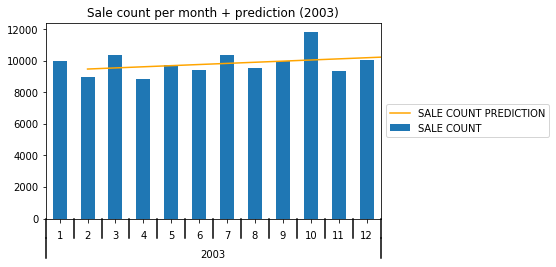

In [57]:
# Getting amount of sales per month using already grouped sales frame from above
month_sale_count = sales_frame_sale_date["SALE PRICE"].count().reset_index()
month_sale_count = month_sale_count.rename(columns={"SALE PRICE": "SALE COUNT"})
#pd.options.display.float_format = '{:.2f}'.format
print(month_sale_count)

xq = month_sale_count["SALE MONTH"]
yq = month_sale_count["SALE COUNT"]

model = LinearRegression()
xsq = []
for q in xq:
    xsq.append([q])
model.fit(xsq, yq)

predicted_count = model.predict(xsq)

def count_table():
    data_table = month_sale_count
    return data_table

def add_line(ax, xpos, ypos):
    line = plt.Line2D([xpos, xpos], [ypos + .1, ypos],
                      transform=ax.transAxes, color='black')
    line.set_clip_on(False)
    ax.add_line(line)

def label_len(my_index,level):
    labels = my_index.get_level_values(level)
    return [(k, sum(1 for i in g)) for k,g in groupby(labels)]

def label_group_bar_table(ax, df):
    ypos = -.1
    scale = 1./df.index.size
    for level in range(df.index.nlevels)[::-1]:
        pos = 0
        for label, rpos in label_len(df.index,level):
            lxpos = (pos + .5 * rpos)*scale
            ax.text(lxpos, ypos, label, ha='center', transform=ax.transAxes)
            add_line(ax, pos*scale, ypos)
            pos += rpos
        add_line(ax, pos*scale , ypos)
        ypos -= .1

df = count_table().groupby(["SALE YEAR", "SALE MONTH"]).sum()
fig = plt.figure()
ax = fig.add_subplot(111)
df.plot(kind='bar',stacked=True,ax=fig.gca())
plt.plot(xq, predicted_count, color="orange", label="SALE COUNT PREDICTION")
#Below 3 lines remove default labels
labels = ['' for item in ax.get_xticklabels()]
ax.set_xticklabels(labels)
ax.set_xlabel('')
label_group_bar_table(ax, df)
fig.subplots_adjust(bottom=.1*df.index.nlevels)
plt.title("Sale count per month + prediction (2003)")
plt.legend(loc="center left", bbox_to_anchor=(1,0.5))
plt.savefig("data/Sales_count2003_prediction.jpg", bbox_inches="tight")
plt.show()